- 분류는 얼마나 가깝냐를 꼐산하는 것에 가깝고
- 회귀는 임의의 어떤 숫자를 예측하는 것에 가깝다(경제성장률, 주식에서 숫자의 변화폭, 배달이 도착할 시간을 예측하는 등)
- 두 변수 사이의 상관관계를 예측하는 것이 회귀

- 생선의 길이, 높이, 두께로 무게를 예측해본다
- 내 주변의 평균값을 보는 것(예측값이 평균 안에 들어오는 것이 인지상정일 것이다->평균회귀의 회귀)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/Fish.csv')

In [4]:
cond = df['Species'] == 'Perch'
perch_data = df.loc[cond]
perch_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


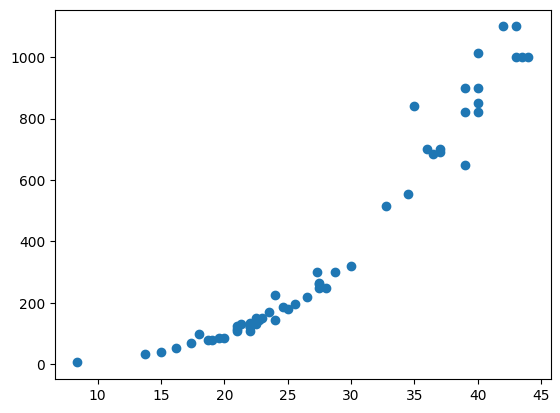

In [5]:
# 길이와 몸무게가 어떤 상관관계를 가지고 있는지 보자
import matplotlib.pyplot as plt

plt.scatter(perch_data['Length2'], perch_data['Weight'])

In [11]:
# 이걸로 최근접 회귀를 사용해보겟다
# 새로운 길이 데이터를 넣으면 어떤 무게일지 예측해보는 것
from sklearn.model_selection import train_test_split
tts = train_test_split
x_input, y_input, x_target, y_target = tts(perch_data[['Length2']], perch_data[['Weight']])

In [12]:
x_input.head()

,Length2
125,43.0
113,36.0
84,21.0
94,23.0
81,20.0


In [13]:
from sklearn.neighbors import KNeighborsRegressor # 리그레션을 하기 위한 도구로 보면 된다

In [14]:
knr = KNeighborsRegressor()

In [15]:
knr.fit(x_input, x_target) # 학습시키기

KNeighborsRegressor()

1. 알고리즘 가져온다 : `from`, `import`로..
2. 학습시킨다 : `knr.fit`으로
3. 예측한다 : 

In [18]:
knr.score(y_input, y_target) # 94%정도 맞췃다

0.9712547778271609

몸무게를 예측한다 -> 10cm인 생선의 무게가 100g이어야 하는데 94g으로 예측햇다면 100g과의 차이만큼 예측에 실패한 것이라서
R^2 = 1 - (타깃 - 예측)^2의 합/(타깃 - 평균)^2의 합

In [24]:
from sklearn.metrics import mean_absolute_error # 예측하려는 데이터가 평균과 얼마나 차이가 있나요를 보겟다

y_prediction = knr.predict(y_input)# 프리딕트에게 테스트 인풋을 예측해보라고 하는 구문

In [25]:
print(y_input)
print(y_prediction)

     Length2
78      18.7
106     28.0
95      23.5
101     26.5
126     43.5
110     34.5
111     35.0
127     44.0
104     27.5
118     39.0
73      13.7
90      22.0
99      25.0
80      19.6
[[  92.  ]
 [ 286.  ]
 [ 163.  ]
 [ 239.  ]
 [1023.  ]
 [ 657.8 ]
 [ 657.8 ]
 [1023.  ]
 [ 261.4 ]
 [ 857.  ]
 [  53.48]
 [ 131.  ]
 [ 181.  ]
 [ 103.  ]]


In [28]:
mae = mean_absolute_error(y_target, y_prediction)
print(mae)
# 아래 나오는 결과는 결과값만큼의 g(무게)오차가 나온다는 뜻이다. 오차들의 평균이 (아래결과값)이다

36.434285714285714


In [31]:
knr.score(x_input, x_target) # 학습햇던 데이터를 그대로 줘서 본 스코어

0.9800592838686548

보통은 훈련세트의 점수가 더 높게 나오는게 정상인데 테스트에서 나온 점수와의 차이에 따라
**과대적합**, **과소적합** 이라고 부른다
- k개는 기본값 5로 설정되어있는데 아래에서 바꿔보자

In [33]:
knr.n_neighbors = 3 # 사람이 직접 입력해야 하는 하이퍼파라미터라서 사람이 노가다로 적합치를 찾아야 한다
knr.fit(x_input, x_target)

print(knr.score(x_input, x_target))
print(knr.score(y_input, y_target)) # 이게 일반적이다 최대한 근사치를 맞추는 것

0.9831731438253268
0.9762744026787683


그럼 여기에 어떤 숫자를 넣어야 최적인가?
- knr.n_neighbors =
책에도 있는 강사님 코드 복붙하고 보기